In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import scipy.stats as stats


In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df_copy= df.copy()
df_copy = pd.get_dummies(df_copy, columns=['Sex'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ChestPainType'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ExerciseAngina'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['ST_Slope'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['RestingECG'], drop_first=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,1,1,0,0,0,0,1,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,0,1,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,1,0,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Splitting features and target variable
X = df_copy.drop('HeartDisease', axis=1)
y = df_copy['HeartDisease']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluating the model
print("Classification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



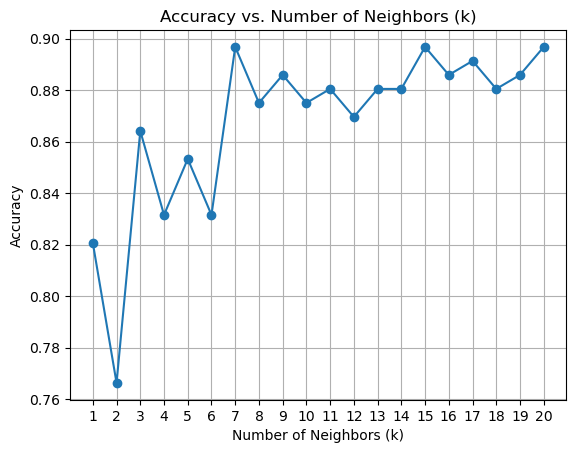

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Splitting features and target variable
X = df_copy.drop('HeartDisease', axis=1)
y = df_copy['HeartDisease']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate accuracy for different values of k
k_values = range(1, 21)  # You can adjust the range of k values
accuracies = []
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for k
param_grid = {'n_neighbors': range(1, 21)}  # Range of k values to try

# Create KNN model
knn_model = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best value of k:", grid_search.best_params_['n_neighbors'])

# Predictions with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluating the model
print("Classification report:")
print(classification_report(y_test, y_pred))


Best value of k: 19
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

